#   Deep Learning with Tensorflow

This project build a classifier to predict whether a bank note is authentic or not. 
The data is from [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) of the UCI repository.

## Loading Data

In [43]:
# import library
import pandas as pd
import numpy as np
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# read data
df=pd.read_csv('bank_note_data.csv')

# display top five rows
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [44]:
# from the summary statistic we can see there is no missing value
# for these numerical features, we will conduct feature scaling later for better model performance
df.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Exploratory Data Analysis

In [45]:
# import visualization library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

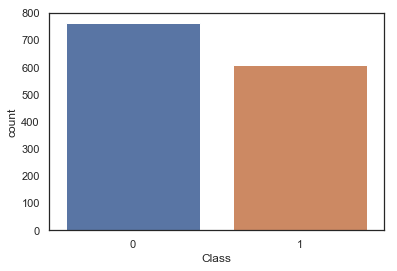

In [46]:
# plotting histogram of class count
sns.countplot(x='Class',data=df)

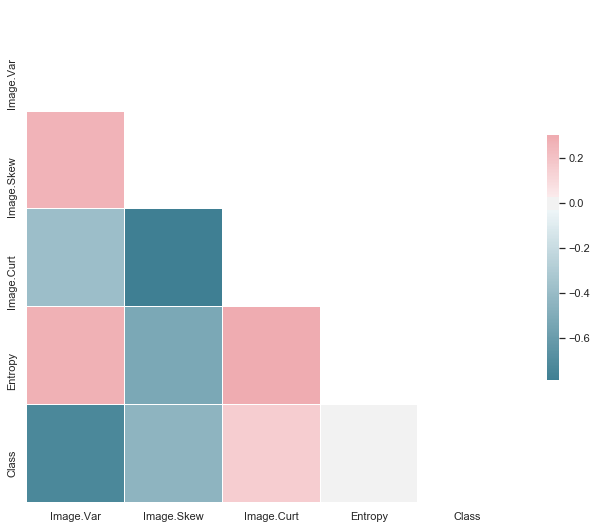

In [47]:
# Plotting a diagonal correlation matrix
sns.set(style="white")
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Data Preprocessing
### Feature Scaling

In [49]:
# conduct feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# create feature matrix
X = df.drop('Class',axis=1)
X = scaler.fit_transform(X)
# convert X to dataframe
X=pd.DataFrame(X,columns=df.columns[:-1])
#create target variable
y =df['Class']

   Image.Var  Image.Skew  Image.Curt   Entropy
0   1.121806    1.149455   -0.975970  0.354561
1   1.447066    1.064453   -0.895036 -0.128767
2   1.207810   -0.777352    0.122218  0.618073
3   1.063742    1.295478   -1.255397 -1.144029
4  -0.036772   -1.087038    0.736730  0.096587


### Train Test Split

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 14)

In [99]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1097 samples.
Testing set has 275 samples.


## Building Model

In [106]:
# import tensorflow library
import tensorflow as tf

# creating feature column
var = tf.feature_column.numeric_column("Image.Var")
skew = tf.feature_column.numeric_column('Image.Skew')
curt = tf.feature_column.numeric_column('Image.Curt')
entropy =tf.feature_column.numeric_column('Entropy')

features = [var,skew,curt,entropy]

#create input
inputs = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=30,shuffle=True)

# create model
clf = tf.estimator.DNNClassifier(hidden_units=[20,20], n_classes=2,feature_columns=features)

# train model
clf.train(input_fn = inputs,steps=500)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/dc/b7njbfhn7_3bh10vcn_qpfn40000gn/T/tmp1d3o12jz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a28fcb9b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 

## Model Evaluation

In [107]:
# create another pandas_input_fn using test set
pred = tf.estimator.inputs.pandas_input_fn(x=X_test,shuffle=False)
prediction = clf.predict(input_fn=pred)

In [108]:
# understand prediction results structure
prediction = list(prediction)
print(prediction[:5])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/dc/b7njbfhn7_3bh10vcn_qpfn40000gn/T/tmp1d3o12jz/model.ckpt-37
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([-5.9622087], dtype=float32), 'logistic': array([0.00256761], dtype=float32), 'probabilities': array([0.9974324 , 0.00256761], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object)}, {'logits': array([5.544507], dtype=float32), 'logistic': array([0.9961063], dtype=float32), 'probabilities': array([0.00389365, 0.9961063 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)}, {'logits': array([5.693948], dtype=float32), 'logistic': array([0.99664503], dtype=float32), 'probabilities': array([0.00335498, 0.99664503], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object)}, {'logits': array

In [109]:
# store class prediction in a list
results = []
for item in prediction:
    results.append(item['class_ids'][0])

In [110]:
# generate classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,results))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       149
           1       0.97      1.00      0.98       126

   micro avg       0.99      0.99      0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



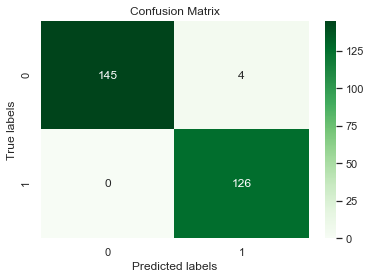

In [111]:
cm = confusion_matrix(y_test,results)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='Greens'); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 